# Template for Final Notebook
*Version:* `1.2` *(Jupytext, time measurements, logger, param notebook execution, fixes)*

<a name="ToC"></a>
# Table of Content

- [Notebook Description](#0)
- [General Settings](#1)
    - [Paths](#1-1)
    - [Notebook Functionality and Appearance](#1-2)
    - [External Libraries](#1-3)
    - [Internal Code](#1-4)
    - [Constants](#1-5)   
- [Analysis](#2)   
    - [Questions](#2-2)
        - [Q1 Run Mage](#2-2-1)     
        - [Q2 Creating a project](#2-2-2)
        - [Q3 Creating a pipeline](#2-2-3)
        - [Q4 Data preparation](#2-2-4)
        - [Q5 Train a model](#2-2-5)
        - [Q6 Register the model](#2-2-6)   
- [Final Timestamp](#3)  

<a name="0"></a>
# Notebook Description
[ToC](#ToC) 

> *Please put your comments about the notebook functionality here.*  

<a name="1"></a>
# GENERAL SETTINGS
[ToC](#ToC)  
General settings for the notebook (paths, python libraries, own code, notebook constants). 

> *NOTE: All imports and constants for the notebook settings shoud be here. Nothing should be imported in the analysis section.*

<a name="1-1"></a>
### Paths
[ToC](#ToC)  

Adding paths that are necessary to import code from within the repository.

In [1]:
import sys
import os
sys.path+=[os.path.join(os.getcwd(), ".."), os.path.join(os.getcwd(), "../..")] # one and two up

<a name="1-2"></a>
### Notebook Functionality and Appearance
[ToC](#ToC)  
Necessary libraries for notebook functionality:
- A button for hiding/showing the code. By default it is deactivated and can be activated by setting CREATE_BUTTON constant to True. 
> **NOTE: This way, using the function, the button works only in active notebook. If the functionality needs to be preserved in html export, then the code has to be incluced directly into notebook.**
- Set notebook width to 100%.
- Notebook data frame setting for better visibility.
- Initial timestamp setting and logging the start of the execution.

#### Overall Setting Specification

In [2]:
LOGGER_CONFIG_NAME = "logger_file_limit_console"
ADDAPT_WIDTH = False

#### Overall Behaviour Setting

In [3]:
try:
    from src.utils.notebook_support_functions import create_button, get_notebook_name
    NOTEBOOK_NAME = get_notebook_name()
    SUPPORT_FUNCTIONS_READ = True
except:
    NOTEBOOK_NAME = "NO_NAME"
    SUPPORT_FUNCTIONS_READ = False  

In [4]:
from src.utils.logger import Logger
from src.utils.envs import Envs
from src.utils.config import Config
from pandas import options
from IPython.display import display, HTML

In [5]:
options.display.max_rows = 500
options.display.max_columns = 500
envs = Envs()
envs.set_logger(LOGGER_CONFIG_NAME)
Logger().start_timer(f"NOTEBOOK; Notebook name: {NOTEBOOK_NAME}")
if ADDAPT_WIDTH:
    display(HTML("<style>.container { width:100% !important; }</style>")) # notebook width

2024-06-02 16:40:35,382 - file_limit_console - INFO - Logger was created on WS-3000 in branche 003_do_week_03_hw.
2024-06-02 16:40:35,385 - file_limit_console - INFO - Process: NOTEBOOK; Notebook name: W03_HW.ipynb; Timer started;


In [6]:
# create_button()

<a name="1-3"></a>
### External Libraries
[ToC](#ToC)  

In [7]:
from datetime import datetime

from IPython.display import display, HTML, Image

<a name="1-4"></a>
### Internal Code
[ToC](#ToC)  
Code, libraries, classes, functions from within the repository.

In [8]:
from src.utils.date_time_functions import create_datetime_id

<a name="1-5"></a>
### Constants
[ToC](#ToC)  
Constants for the notebook.

> *NOTE: Please use all letters upper.*

#### General Constants
[ToC](#ToC)  

In [9]:
# from src.global_constants import *  # Remember to import only the constants in use
N_ROWS_TO_DISPLAY = 2
FIGURE_SIZE_SETTING = {"autosize": False, "width": 2200, "height": 750}
DATA_PROCESSING_CONFIG_NAME = "data_processing_basic"

#### Constants for Setting Automatic Run
[ToC](#ToC)  

In [10]:
# MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION #########################################
PYTHON_CONFIG_NAME = "python_local"
ID = create_datetime_id(now=datetime.now(), add_micro=False)
# (END) MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION ###################################

#### Python Config Initialisation
[ToC](#ToC)  

In [11]:
envs.set_config(PYTHON_CONFIG_NAME)

#### Notebook Specific Constants
[ToC](#ToC)  

<a name="2"></a>
# ANALYSIS
[ToC](#ToC)  

<a name="2-2"></a>
## Questions
[ToC](#ToC)  

<a name="2-2-1"></a>
### Q1 Run Mage
[ToC](#ToC)  

First, let's run Mage with Docker Compose. Follow the quick start guideline.

What's the version of Mage we run?

(You can see it in the UI)

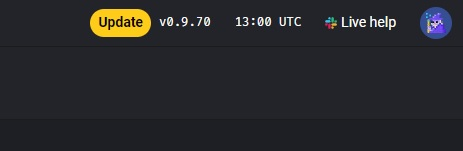

In [15]:
display(Image(filename="W3_Q01.png"))

<a name="2-2-2"></a>
### Q2 Creating a project
[ToC](#ToC)  

Now let's create a new project. We can call it "homework_03", for example.

How many lines are in the created metadata.yaml file?

35  
45  
55  
65  

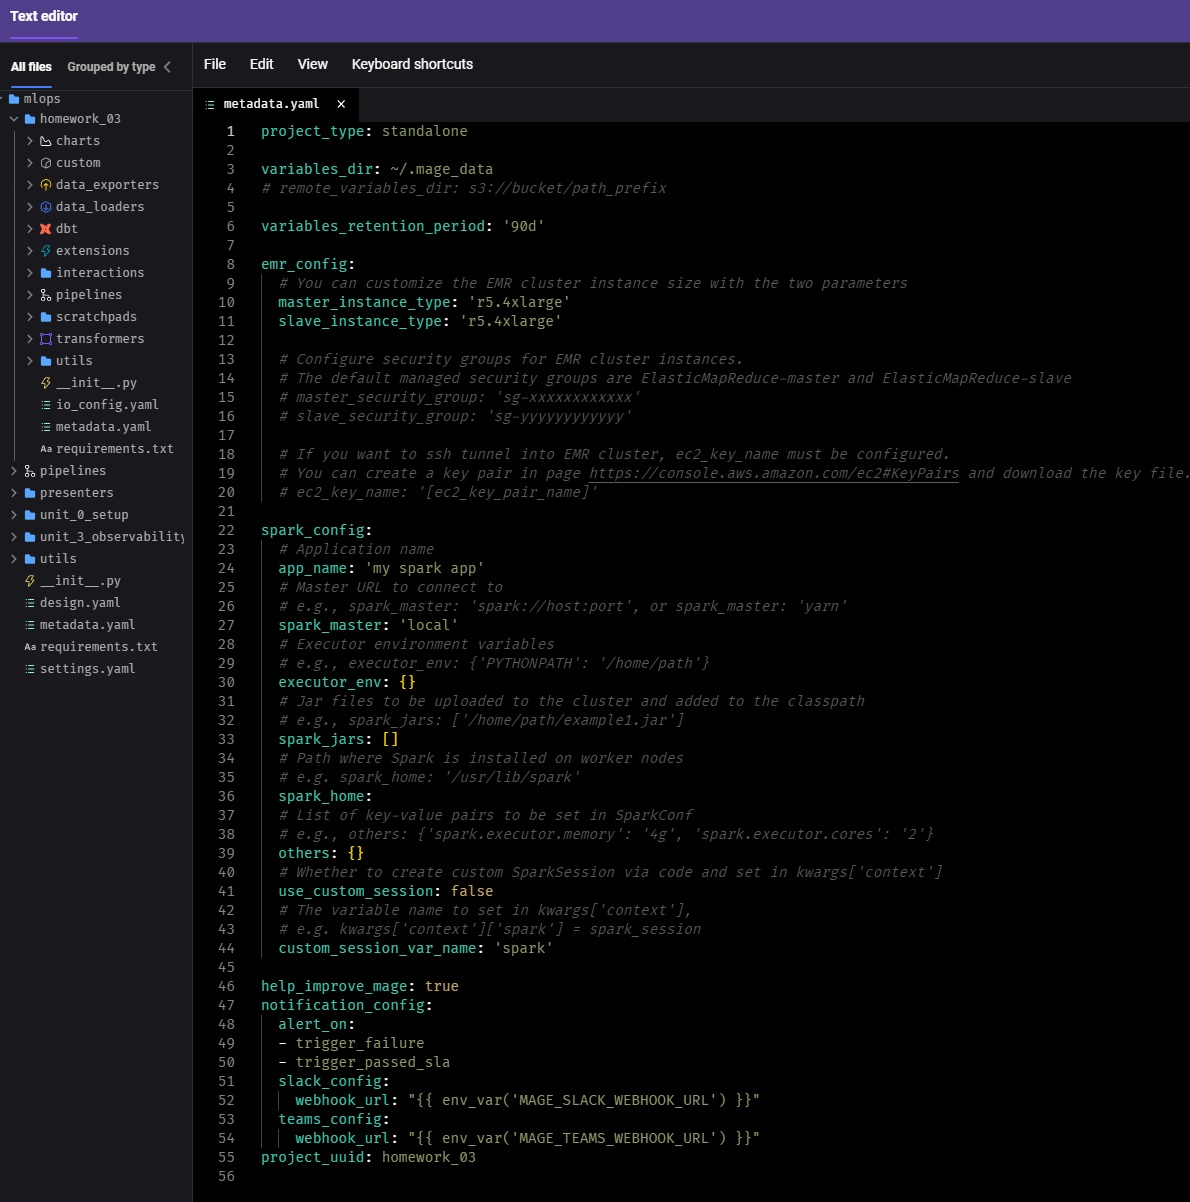

In [16]:
display(Image(filename="W3_Q02.png"))

<a name="2-2-3"></a>
### Q3 Creating a pipeline
[ToC](#ToC)  

Let's create an ingestion code block.

In this block, we will read the March 2023 Yellow taxi trips data.

How many records did we load?

3,003,766  
3,203,766  
3,403,766  
3,603,766  

<a name="2-2-4"></a>
### Q4 Data preparation
[ToC](#ToC)  

Let's use the same logic for preparing the data we used previously. We will need to create a tranformer code block and put this code there.

This is what we used (adjusted for yellow dataset):

~~~
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df
Let's adjust it and apply to the data we loaded in question 3.
~~~

What's the size of the result?

2,903,766  
3,103,766  
3,316,216  
3,503,766  

<a name="2-2-5"></a>
### Q5 Train a model
[ToC](#ToC)  

We will now train a linear regression model using the same code as in homework 1

Fit a dict vectorizer
Train a linear regression with default parameres
Use pick up and drop off locations separately, don't create a combination feature
Let's now use it in the pipeline. We will need to create another tranformation block, and return both the dict vectorizer and the model

What's the intercept of the model?

Hint: print the intercept_ field in the code block

21.77  
24.77  
27.77  
31.77  

<a name="2-2-6"></a>
### Q6 Register the model
[ToC](#ToC)  

The model is traned, so let's save it with MLFlow.

If you run mage with docker-compose, stop it with Ctrl+C or

~~~
docker-compose down
~~~

Let's create a dockerfile for mlflow, e.g. mlflow.dockerfile:

~~~
FROM python:3.10-slim

RUN pip install mlflow==2.12.1

EXPOSE 5000

CMD [ \
    "mlflow", "server", \
    "--backend-store-uri", "sqlite:///home/mlflow/mlflow.db", \
    "--host", "0.0.0.0", \
    "--port", "5000" \
]
~~~

And add it to the docker-compose.yaml:

~~~
  mlflow:
    build:
      context: .
      dockerfile: mlflow.dockerfile
    ports:
      - "5000:5000"
    volumes:
      - "${PWD}/mlflow:/home/mlflow/"
    networks:
      - app-network
~~~

Note that app-network is the same network as for mage and postgre containers. If you use a different compose file, adjust it.

We should already have mlflow==2.12.1 in requirements.txt in the mage project we created for the module. If you're starting from scratch, add it to your requirements.

Next, start the compose again and create a data exporter block.

In the block, we

Log the model (linear regression)
Save and log the artifact (dict vectorizer)
If you used the suggested docker-compose snippet, mlflow should be accessible at http://mlflow:5000.

Find the logged model, and find MLModel file. What's the size of the model? (model_size_bytes field):

14,534 
9,534  
4,534  
1,534  
Note: typically we do two last steps in one code block

<a name="3"></a>
# Final Timestamp
[ToC](#ToC)  

In [ ]:
Logger().end_timer()